# Pymaceuticals Inc.
---

### Analysis

- It appears from the analysis that of the four drug regimens subjected to the last analysis, Capomulin and Ramicane provided the best outcomes in terms of final tumor size. However, there appears to be a linear relationship between body weight and tumor volume for the Capomulin regimen. This could mean a number of things. including: a predictable tumor volume based on body weight, the positive slope indicates that as body weight increases, the average tumor volume also increases, which might suggest that the drug is less effective for heavier subjects, and that dosage adjustments need to be made based on body weight to increase effectiveness of the drug. 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left") 

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_df['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_regimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_regimen, "Median Tumor Volume": median_regimen, "Tumor Volume Variance": variance_regimen, "Tumor Volume Std. Dev.": std_regimen, "Tumor Volume Std. Err.": sem_regimen})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

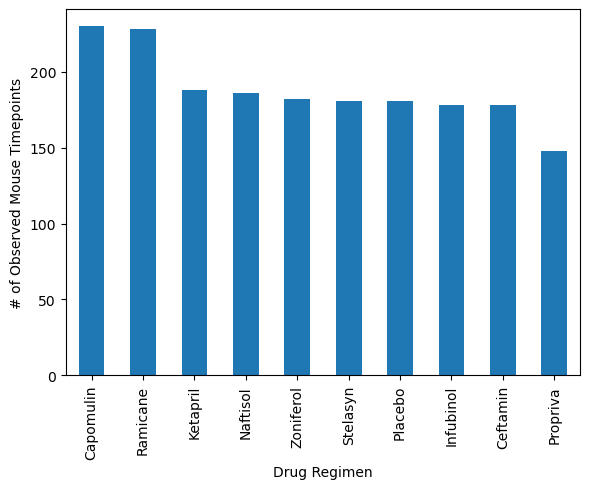

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df["Drug Regimen"].value_counts()
drug_plot = drug_regimen.plot(kind="bar", figsize=(6,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

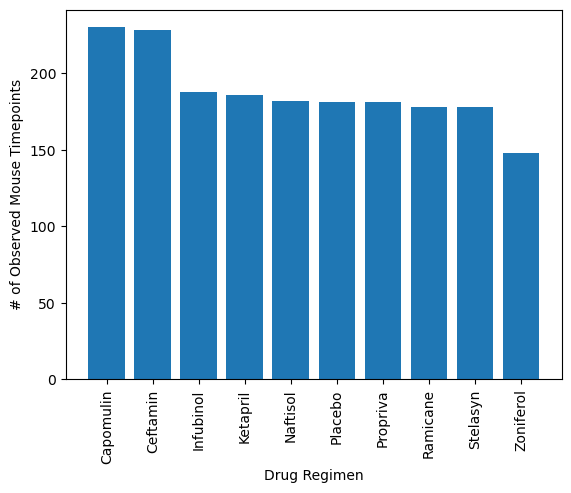

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(summary_stats.index, clean_df["Drug Regimen"].value_counts())
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='count'>

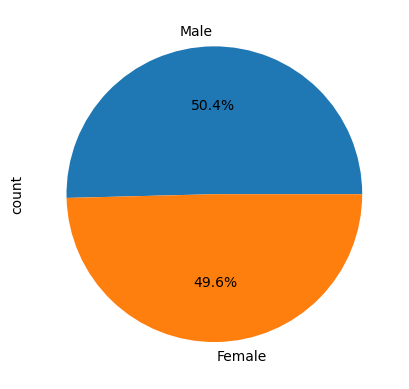

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_count_pd = clean_df.groupby('Sex')['Mouse ID'].nunique()

# Get the unique mice with their gender
sex_count_pd = sex_count_pd.reindex(['Male', 'Female'])

# Make the pie chart
sex_count_pd.plot(kind="pie", ylabel="count", autopct="%.1f%%")

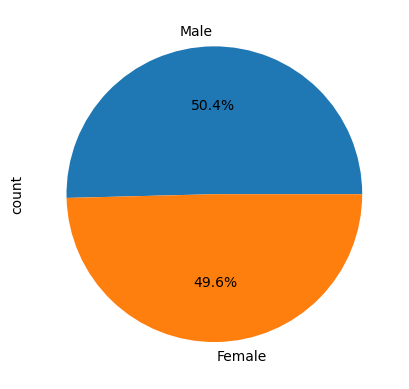

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
sex_count_pyplot = clean_df.groupby("Sex")["Mouse ID"].nunique()

# Get the unique mice with their gender
sex_count_pyplot = sex_count_pyplot.reindex(['Male', 'Female'])

# # Make the pie chart
plt.pie(sex_count_pyplot, labels=sex_count_pyplot.index, autopct="%.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_df.groupby("Mouse ID")['Timepoint'].max()
final_tumor_vol = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_vol = final_tumor_vol[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
final_tumor_vol = final_tumor_vol.sort_values(['Drug Regimen', 'Mouse ID'])
final_tumor_vol.head(10)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
19,b128,Capomulin,45,38.982878
24,b742,Capomulin,45,38.939633
61,f966,Capomulin,20,30.485985
64,g288,Capomulin,45,37.074024
66,g316,Capomulin,45,40.159220
80,i557,Capomulin,45,47.685963
83,i738,Capomulin,45,37.311846
85,j119,Capomulin,45,38.125164
87,j246,Capomulin,35,38.753265
108,l509,Capomulin,45,41.483008


In [39]:
# Step 1: Define the drug regimens
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create a function to identify outliers
def find_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Step 3: Iterate through each drug regimen and find outliers
for regimen in drug_regimens:
    # Filter the DataFrame for the current drug regimen
    tumor_volumes = final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Find outliers
    outliers = find_outliers(tumor_volumes)
    
    # Print the results in the specified format
    if outliers.empty:
        print(f"{regimen}'s potential outliers: {outliers}")
    else:
        print(f"{regimen}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


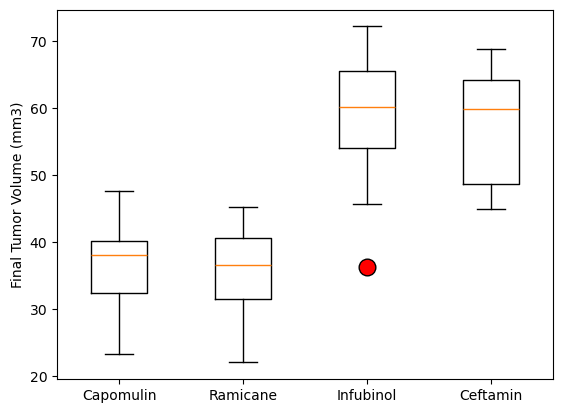

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.boxplot([final_tumor_vol[final_tumor_vol['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in drug_regimens], labels=drug_regimens, flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

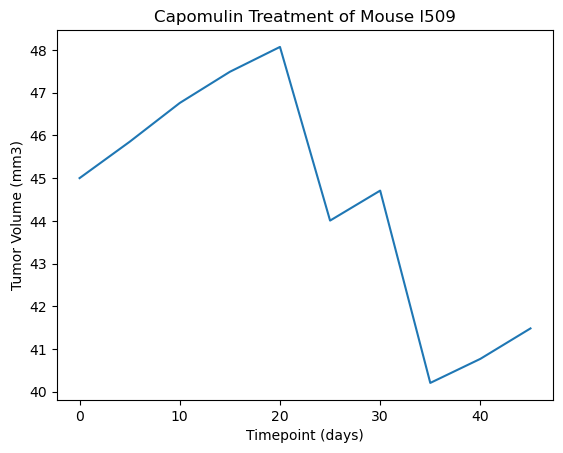

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the Mouse ID you want to analyze
capomulin_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

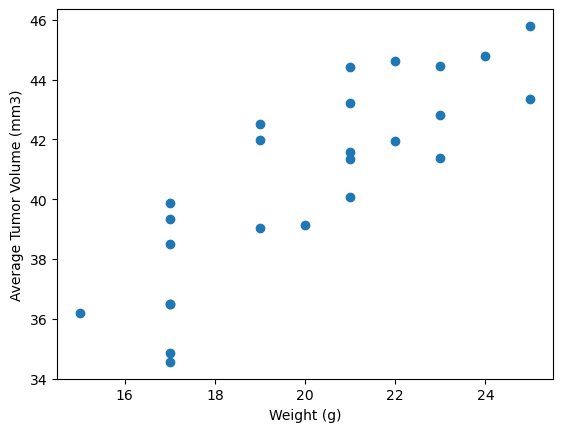

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
average_tumor_volume = average_tumor_volume.merge(capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID').drop_duplicates()
weight = average_tumor_volume['Weight (g)']
tumor_volume = average_tumor_volume['Tumor Volume (mm3)']
plt.scatter(weight, tumor_volume)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84


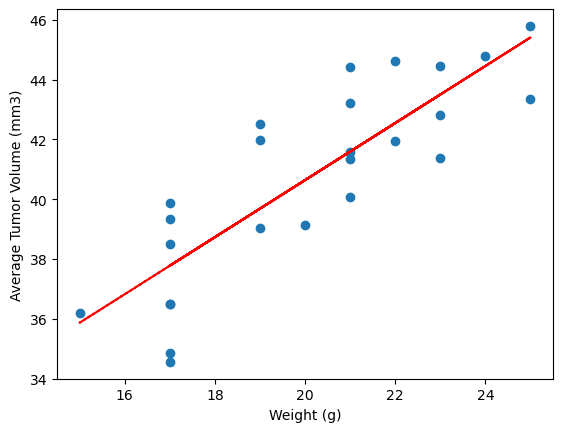

In [43]:
print(f"The correlation between mouse weight and tumor volume is {(stats.pearsonr(weight, tumor_volume)[0]):.2f}")
slope, int, r, p, std_err = stats.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
fit = slope * average_tumor_volume['Weight (g)'] + int
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume['Weight (g)'], fit, "--", color='r')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()